In [4]:
import os
import re

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

## color wheel plotting

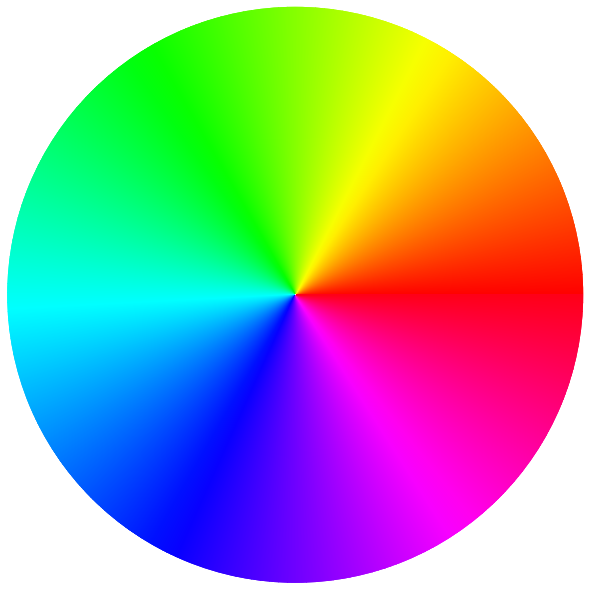

In [23]:
fig = plt.figure()

radius = 2.
display_axes = fig.add_axes([0., 0., radius, radius], projection='polar')

norm = mpl.colors.Normalize(0.0, 2*np.pi)

# Plot the colorbar onto the polar axis
# note - use orientation horizontal so that the gradient goes around
# the wheel rather than centre out
quant_steps = 2000
cb = mpl.colorbar.ColorbarBase(display_axes,
        cmap=mpl.cm.get_cmap('hsv', quant_steps),
        norm=norm,
        orientation='horizontal', )

# aesthetics - get rid of border and axis labels                                   
cb.outline.set_visible(False)   

display_axes.set_axis_off()
plt.show()

what you effectively need is a hashmap that links RGB/HEX value to a location in space

In [34]:
azimuths, zeniths

(array([0.        , 0.06346652, 0.12693304, 0.19039955, 0.25386607,
        0.31733259, 0.38079911, 0.44426563, 0.50773215, 0.57119866,
        0.63466518, 0.6981317 , 0.76159822, 0.82506474, 0.88853126,
        0.95199777, 1.01546429, 1.07893081, 1.14239733, 1.20586385,
        1.26933037, 1.33279688, 1.3962634 , 1.45972992, 1.52319644,
        1.58666296, 1.65012947, 1.71359599, 1.77706251, 1.84052903,
        1.90399555, 1.96746207, 2.03092858, 2.0943951 , 2.15786162,
        2.22132814, 2.28479466, 2.34826118, 2.41172769, 2.47519421,
        2.53866073, 2.60212725, 2.66559377, 2.72906028, 2.7925268 ,
        2.85599332, 2.91945984, 2.98292636, 3.04639288, 3.10985939,
        3.17332591, 3.23679243, 3.30025895, 3.36372547, 3.42719199,
        3.4906585 , 3.55412502, 3.61759154, 3.68105806, 3.74452458,
        3.8079911 , 3.87145761, 3.93492413, 3.99839065, 4.06185717,
        4.12532369, 4.1887902 , 4.25225672, 4.31572324, 4.37918976,
        4.44265628, 4.5061228 , 4.56958931, 4.63

In [41]:
azimuths.shape, zeniths.shape

((100,), (7,))

In [38]:
values1.shape

(100, 7)

In [40]:
r.shape, theta.shape

((100, 7), (100, 7))

AttributeError: 'PolarAxesSubplot' object has no attribute 'heatmap'

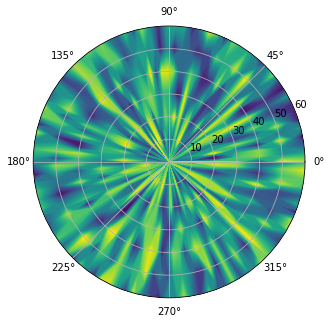

In [191]:
#-- Generate Data -----------------------------------------
# Using linspace so that the endpoint of 360 is included...
azimuths = np.radians(np.linspace(0, 360, 100))
zeniths = np.arange(0, 70, 10)
r, theta = np.meshgrid(zeniths, azimuths)
values1 = np.random.random((azimuths.size, zeniths.size))
values2 = np.random.random((azimuths.size, zeniths.size))

#-- Plot... ------------------------------------------------
fig, axs = plt.subplots(1, 1, figsize=(12,5),subplot_kw=dict(projection='polar'))
p1 = axs.contourf(theta, r, values1, 100)
p1 = axs.heatmap
# p2 = axs[1].contourf(theta, r, values2, 100)

#-- obtaining the colormap limits
vmin,vmax = p1.get_clim()
#-- Defining a normalised scale
cNorm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
#-- Creating a new axes at the right side
ax3 = fig.add_axes([0.9, 0.1, 0.03, 0.8])
#-- Plotting the colormap in the created axes
cb1 = mpl.colorbar.ColorbarBase(ax3, norm=cNorm)
fig.subplots_adjust(left=0.05,right=0.85)
plt.show()

In [465]:
color_matrix.shape

(256, 50, 3)

In [475]:
np.sum(color_matrix - color, axis=2).shape

(256, 50)

In [498]:
color = (255., 0., 0.)
X = np.sum(np.abs(color_matrix - color), axis=2)
# np.argmin(X, axis=3)
idxs = np.unravel_index(np.argmin(X, axis=None), X.shape)
idxs

(0, 25)

In [512]:
color = (255., 255., 0.)
x, y = get_polar_for_color(color, color_matrix)
x,y

(1.055378782065321, 24)

In [509]:
def get_polar_for_color(c, color_matrix):
    X = np.sum(np.abs(color_matrix - color), axis=2)
    x, y = np.unravel_index(np.argmin(X, axis=None), X.shape)
    
    x = (x / N) * (2 * np.pi)
    return x , y

In [506]:
color_matrix[x, y, :]

array([1., 0., 0.])

In [471]:
vals = []
N = 256
H = 50
colormap = plt.get_cmap('hsv')
for i in range(N):
    ls = [lighten_color(colormap(i / N), j/H) for j in range(0, 2 * H, 2)]
    vals.append(np.reshape(ls, (-1,3)))
#     print(np.asarray(vals).shape)
color_matrix = np.asarray(vals)
vals = np.asarray(vals).reshape((-1, 3))
pad = np.full((vals.shape[0], 1), 1.)

vals = np.concatenate((vals, pad), axis=1)
newcmp = mpl.colors.ListedColormap(vals)

In [453]:
# color_matrix

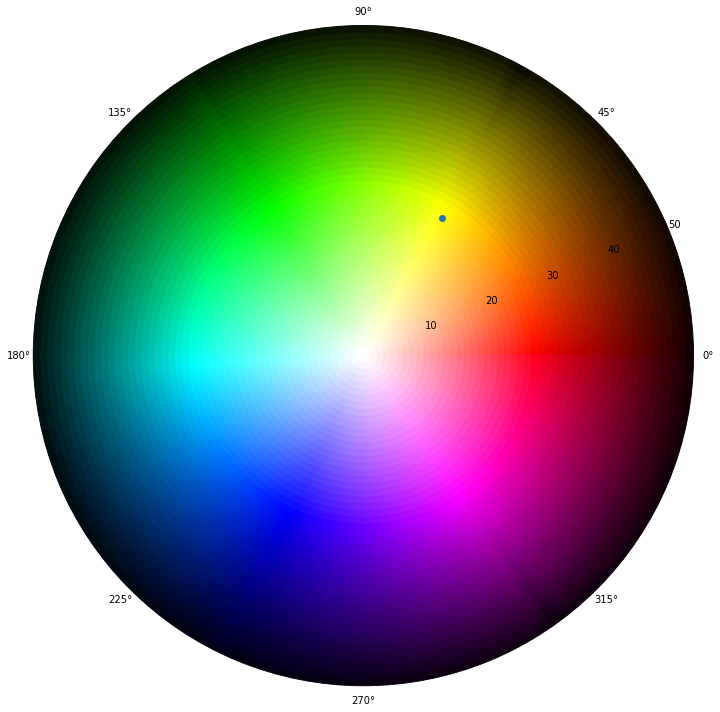

In [513]:
fig, axs = plt.subplots(1, 1, figsize=(10,10),subplot_kw=dict(projection='polar'))

rad = np.linspace(0, H, H)
azm = np.linspace(0, 2 * np.pi, N)
r, th = np.meshgrid(rad, azm)
z = (r ** 2.0) / 4.0
# z = np.arange(N * , dtype=np.float64).reshape((N, (H-1))) / (N*(H-1))
z = np.arange(N * H, dtype=np.float64).reshape((N, H)) / (N*H)
# z = np.asarray([list(range(H)) for x in range(N)]) / H

plt.subplot(projection="polar")

vmin, vmax = (np.min(z), np.max(z))
cNorm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

plt.pcolormesh(th, r, z, cmap=newcmp, norm=cNorm)
plt.scatter(x, y)

plt.plot(azm, r, ls='none', color='k') 
plt.tight_layout()

plt.show()

In [129]:
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
#     import mpl.colors as mc
#     import colorsys
    try:
        c = mpl.colors.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mpl.colors.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])